# 데이터의 분포와 범위를 확인하는 바이올린 플롯
- 바이올린 플롯을 이용하여 데이터의 분포와 범위를 표현할 수 있다.
___

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 그래프에 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

## 1. 바이올린 플롯
___
### 1.1. 샘플 데이터
- 125명의 점수 데이터

In [2]:
import numpy as np
# 안풀어도 40점 이상은 보장되는 시험이다.
scores = pd.Series(np.random.randint(40, 101, 125))

scores

0      66
1      55
2      45
3      55
4      54
       ..
120    59
121    96
122    70
123    82
124    71
Length: 125, dtype: int32

### 1.2. 바이올린 플롯
- plt.violinplot(data)

{'bodies': [<matplotlib.collections.PolyCollection at 0x26a7d76da90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x26a7d752860>,
 'cmins': <matplotlib.collections.LineCollection at 0x26a7d76df60>,
 'cbars': <matplotlib.collections.LineCollection at 0x26a7d77c278>}

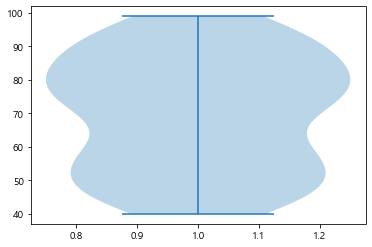

In [5]:
plt.violinplot(scores)
# plt.show() # bodies, cmaxes, cmins, cbars 확인 가능

### 1.3. 최대값, 최소값, 평균값, 중간값 표시
___
- showextrema : 최대값 최소값에 직선 표시(default: True)
- showmeans : 평균값에 직선 표시(default: False)
- showmedians : 중간값에 직선 표시(default: False)

{'bodies': [<matplotlib.collections.PolyCollection at 0x26a7d7d3f60>]}

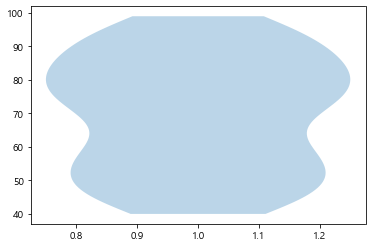

In [6]:
plt.violinplot(scores, showextrema=False)


{'bodies': [<matplotlib.collections.PolyCollection at 0x26a7d838a20>],
 'cmeans': <matplotlib.collections.LineCollection at 0x26a7d8208d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x26a7d838ef0>,
 'cmins': <matplotlib.collections.LineCollection at 0x26a7d84a208>,
 'cbars': <matplotlib.collections.LineCollection at 0x26a7d84a4e0>}

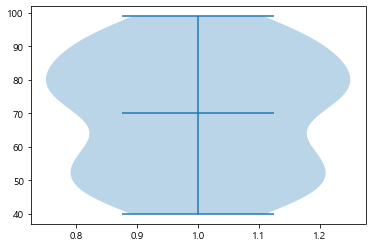

In [7]:
plt.violinplot(scores, showmeans=True)


{'bodies': [<matplotlib.collections.PolyCollection at 0x26a7d967fd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x26a7d974a90>,
 'cmins': <matplotlib.collections.LineCollection at 0x26a7d974fd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x26a7d9832e8>,
 'cmedians': <matplotlib.collections.LineCollection at 0x26a7d9835c0>}

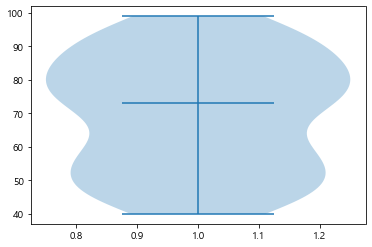

In [9]:
plt.violinplot(scores, showmedians=True)


### 1.4. 분위수 지정하기
- quantiles = 0 ~ 1 사이의 실수 리스트, 해당 분위수에 실전을 표시할 수 있다.

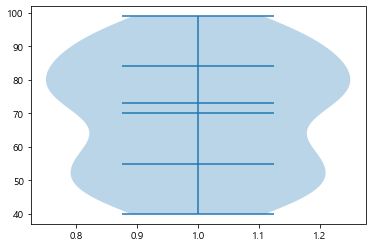

In [12]:
plt.violinplot(scores, showextrema=True, showmeans=True, showmedians=True,
quantiles=[0.25, 0.75])
plt.show()

### 1.5. 스타일 지정하기
- 바이올린 플롯 객체를 받아 스타일을 지정한다.

1. 플롯['bodies'][INDEX].set_facecolor(컬러)
2. 플롯['cmins'].set_edgecolor(컬러)
3. 플롯['cmaxes'].set_edgecolor(컬러)
4. 플롯['cbars'].set_edgecolor(컬러)
5. 플롯['cmedians'].set_edgecolor(컬러)
6. 플롯['cquantiles'].set_edgecolor(컬러)
7. 플롯['cmeans'].set_edgecolor(컬러)

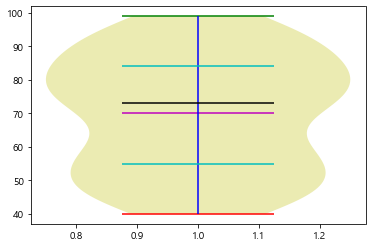

In [16]:
v_plot = plt.violinplot(scores, showextrema=True,
 showmeans=True, showmedians=True, quantiles=[0.25, 0.75])

v_plot['bodies'][0].set_facecolor('y')
v_plot['cmins'].set_edgecolor('r')
v_plot['cmaxes'].set_edgecolor('g')
v_plot['cbars'].set_edgecolor('b')
v_plot['cmedians'].set_edgecolor('k')
v_plot['cquantiles'].set_edgecolor('c')
v_plot['cmeans'].set_edgecolor('m')

## 2. 여러 개의 데이터 비교하기
___
### 2.1. 샘플 데이터
- iris 데이터

In [17]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.2. 바이올린 플롯
___
#### 2.2.1. 기본 그리기
- plt.violinplot(datalist)

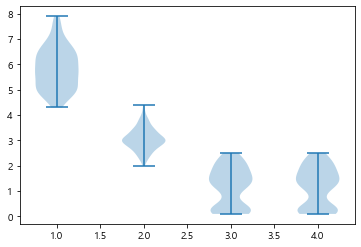

In [26]:
plt.violinplot([iris['sepal_length'], iris['sepal_width'], iris['petal_width'], iris['petal_width']])
# p.v(iris[a], iris[b]) 이렇게 하면 에러, 데이터는 반드시 '[]'로 묶어둘 것
plt.show()

#### 2.2.2. x틱
- xticks([x틱의 구간], [label_name 리스트])

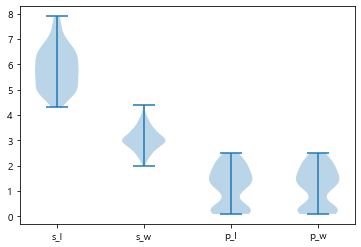

In [27]:
plt.violinplot([iris['sepal_length'], iris['sepal_width'], iris['petal_width'], iris['petal_width']])
# p.v(iris[a], iris[b]) 이렇게 하면 에러, 데이터는 반드시 '[]'로 묶어둘 것
plt.xticks(range(1,5), labels=['s_l', 's_w', 'p_l', 'p_w']) # label 설정
plt.show()

#### 2.2.3. 평균값, 중간값 표시

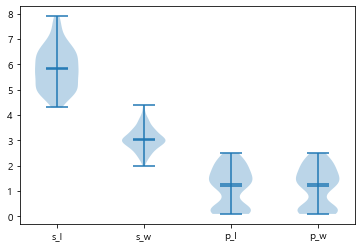

In [28]:
plt.violinplot([iris['sepal_length'], iris['sepal_width'], iris['petal_width'], iris['petal_width']]
, showextrema=True, showmeans=True, showmedians=True)
plt.xticks(range(1,5), labels=['s_l', 's_w', 'p_l', 'p_w']) # label 설정
plt.show()

#### 2.2.4. 분위수 표시

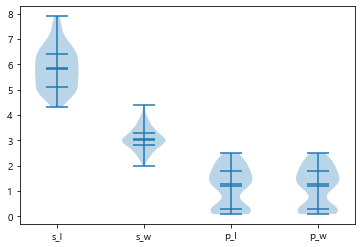

In [31]:
plt.violinplot([iris['sepal_length'], iris['sepal_width'], iris['petal_width'], iris['petal_width']]
, showextrema=True, showmeans=True, showmedians=True, 
quantiles=[[0.25, 0.75],[0.25, 0.75],[0.25, 0.75],[0.25, 0.75]])
# 분위수 표시할 때, 각각의 데이터리스트에 대응되게 정의해야 한다.
plt.xticks(range(1,5), labels=['s_l', 's_w', 'p_l', 'p_w']) # label 설정
plt.show()